In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [2]:
bias = 100
x, y, coef = make_regression(n_features=1, noise=10,random_state=42, bias=bias, coef=True )

In [3]:
(bias, coef)

(100, array(41.74110031))

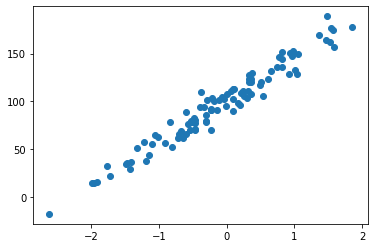

In [4]:
plt.scatter(x, y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()

In [7]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
model.coef_

array([44.43716999])

In [9]:
model.intercept_

101.16511532052698

In [10]:
model.predict(x[:20])

array([142.54856828, 105.03324069,  54.16343497, 115.12937746,
        79.87196826, 129.94656099,  80.57214453, 125.27494821,
       128.34627855, 145.7592773 , 137.68813662, 169.51110768,
       133.98048027,  91.4035183 ,  65.23794765, 105.24270455,
        14.0829209 , 123.9732675 , 146.97981636, -15.24894321])

In [11]:
x.shape, y.shape

((100, 1), (100,))

In [50]:
class CustomeLinearReg:
    
    def __init__(self, lr=.1, max_iters=20):
        
        self.lr = lr
        self.max_iters = max_iters
        
    def fit(self, x, y):
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        errors = []
        for i in range(self.max_iters):
            err = self.gradient_decend(x, y)
            errors.append(err)
        
        return errors
            
    def gradient_decend(self, x, y):
        
        delta_coef, delta_inter, err = self.gradient(x, y)
        
        self.coef_ += delta_coef
        self.intercept_ += delta_inter
        return err
        
    def gradient(self, x, y):
        
        ya = y.reshape(-1, 1)
        yh = self.hypo(x)
        
        diff = (yh - ya)
        
        de2m = np.mean(diff * x)
        de2c = np.mean(diff)
        
        return -de2m*self.lr, -de2c*self.lr, np.mean(diff**2)
        
    def hypo(self, x):
        
        return self.coef_ * x + self.intercept_

In [51]:
mod = CustomeLinearReg()

In [52]:
error = mod.fit(x, y)

In [53]:
mod.coef_

33.0791812697491

In [54]:
mod.intercept_

87.14117462606207

In [55]:
yp = mod.hypo(x)

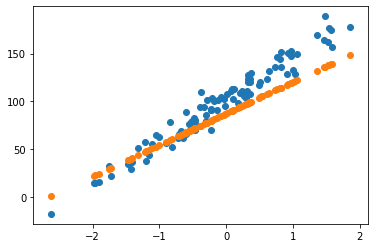

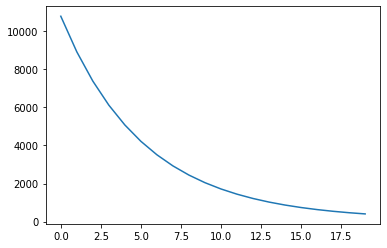

In [56]:
plt.figure()
plt.scatter(x, y)
plt.scatter(x, yp)
plt.show()

plt.figure()
plt.plot(error)
plt.show()